In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import datetime
from pandas_datareader import data as pdr
import ivolat3

In [41]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2019,1,1)
end = datetime.date.today()

# use quandl for american stocks

# use datareader for european stocks
besi = pdr.DataReader('BESI.AS','yahoo',start,end)
sp500 = pdr.DataReader('^GSPC','yahoo',start,end)


In [59]:
besi_stock =pd.DataFrame({
    'BESI Close': besi['Adj Close']
})
sig =np.std(besi_stock)
sig

BESI Close    2.364528
dtype: float64

In [43]:
sp500_df = pd.DataFrame({
    "SP500 Adj Close":sp500['Adj Close']
})

In [60]:
s = besi_stock.iloc[-1]
k = 22
r = 0.003
q = 0.1
t = 14/365
sigma = sig


In [61]:
p = ivolat3.prem_call(s,k,r,q,t,sigma)
p



3.2507434965614976

In [62]:
ivolat3.ivolat_call(s, k, r, q, t, p)

2.3645280998812397

In [89]:
c =besi_stock.mean()
c

BESI Close    21.630087
dtype: float64

In [87]:
c+ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    23.994615
dtype: float64

In [86]:
c-ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    19.265559
dtype: float64

(array([0.00495065, 0.        , 0.00742597, 0.01732727, 0.02475324,
        0.02970389, 0.03465454, 0.05198181, 0.05198181, 0.07673506,
        0.11386492, 0.13119219, 0.11386492, 0.18812465, 0.1930753 ,
        0.16089608, 0.15347011, 0.12376622, 0.13614284, 0.14851946,
        0.16089608, 0.12376622, 0.08663635, 0.09406233, 0.06683376,
        0.05445714, 0.03712987, 0.02227792, 0.02475324, 0.01237662,
        0.01237662, 0.00495065, 0.0099013 , 0.        , 0.00247532]),
 array([15.01852197, 15.42250943, 15.82649689, 16.23048435, 16.63447181,
        17.03845927, 17.44244673, 17.84643419, 18.25042165, 18.6544091 ,
        19.05839656, 19.46238402, 19.86637148, 20.27035894, 20.6743464 ,
        21.07833386, 21.48232132, 21.88630878, 22.29029623, 22.69428369,
        23.09827115, 23.50225861, 23.90624607, 24.31023353, 24.71422099,
        25.11820845, 25.52219591, 25.92618336, 26.33017082, 26.73415828,
        27.13814574, 27.5421332 , 27.94612066, 28.35010812, 28.75409558,
        29.

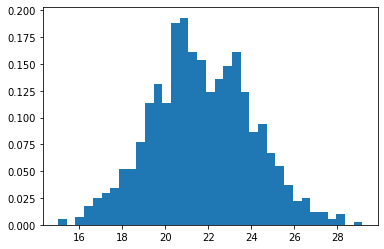

In [98]:
mu = c


d = np.random.normal(mu,sigma,1000)
plt.hist(d, 35, density=True)